<a href="https://colab.research.google.com/github/khadijakatanani/Data-Science/blob/main/Week_9_RL_Q_Learning_teacherVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Q-Learning


**1**.   **What is Q-Learning?**

      Q-learning is a model-free, value-based, off-policy algorithm.
      (The AI agent attempts to construct an optimal policy directly by interacting with the environment)

      Model-free algorithms learn the consequences of their actions through the experience

      The “Q” stands for quality.
      Quality represents how valuable the action is in maximizing future rewards.

      The value-based method trains the value function to learn which state is more valuable and take action.

      Q-learning uses a trial-and-error-based approach
      The AI agent repeatedly tries to solve the problem using varied approaches,
      and continuously updates its policy as it learns more and more about its environment.

      Q-Learning models have
        input and output system,
        rewards,
        an environment,
        Markov decision processes, and
        training & inference.

      The number of possible states is finite: The AI agent will always be in one of a fixed number of possible situations.
      The number of possible actions is finite: The AI agent will always need to choose from among a fixed number of possible actions.

**2**.   **Key Terminologies in Q-learning**

      States(s): the current position of the agent in the environment.
      Action(a): a step taken by the agent in a particular state.
      Rewards: for every action, the agent receives a reward and penalty.
      Episodes: the end of the stage, where agents can’t take new action.
      It happens when the agent has achieved the goal or failed.
      Q(St+1, a): expected optimal Q-value of doing the action in a particular state.
      Q(St, At): it is the current estimation of Q(St+1, a).
      Q-Table: the agent maintains the Q-table of sets of states and actions.
      Temporal Differences(TD): used to estimate the expected value of Q(St+1, a) by using the current state and action and previous state and action.

**3**.   **Q-Values and Bellman Equation**

      The Bellman Equation tells us what new value to use as the Q-value for the action taken in the previous state
        Includes a learning rate parameter (α) that defines how quickly Q-values are adjusted
        Relies on both the old Q-value for the action taken in the previous state and
        what has been learned after moving to the next state.





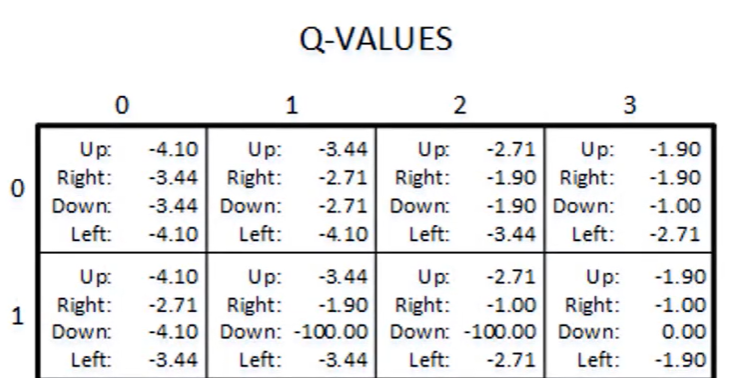

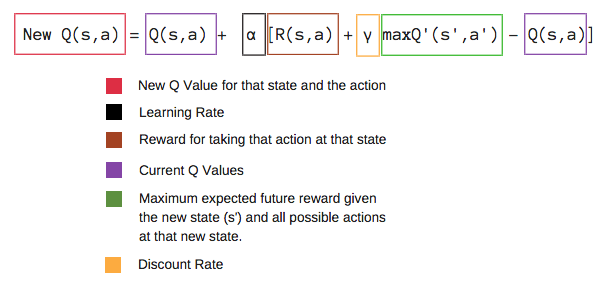

**4**.  **Inference Mode**

      Once the Q-learning model is fully trained, it can be used for inference
      In inference mode:

      Q-values are no longer updated.
      For any state, the action that the AI agent chooses to take is simply the action with the largest Q-value.



**Introduction text**<br>
Let’s begin by introducing the business problem that we’ll be solving in this lesson.
Imagine that a growing e-commerce company is building a new warehouse, and that the
company would like all of the picking operations in the new warehouse to be performed by warehouse
0:39
robots.
0:40
warehouse robots are autonomous ground vehicles that are designed
0:45
to automatically handle many common warehouse-related tasks, such as picking.
0:50
In the context of e-commerce warehousing, “picking” is the task of gathering individual
0:55
items from various locations in the warehouse in order to fulfill customer orders.
1:01
After picking items from the shelves, the e-commerce company would like the robots to
1:05
bring the items to a specific location within the warehouse where the items can be packaged
1:09
for shipping.
1:11
In order to ensure maximum efficiency and productivity, the robots will need to learn
1:15
the shortest path between the packaging area and all of the other locations within the
1:19
warehouse where the robots are allowed to travel.
1:23
Our goal will be to use Q-learning to accomplish this task.

## Scenario - Robots in a Warehouse
A growing e-commerce company is building a new warehouse, and the company would like all of the picking operations in the new warehouse to be performed by warehouse robots.

* In the context of e-commerce warehousing, “picking” is the task of gathering individual items from various locations in the warehouse in order to fulfill customer orders.

After picking items from the shelves, the robots must bring the items to a specific location within the warehouse where the items can be packaged for shipping.

In order to ensure maximum efficiency and productivity, the robots will need to learn the shortest path between the item packaging area and all other locations within the warehouse where the robots are allowed to travel.
* We will use Q-learning to accomplish this task!

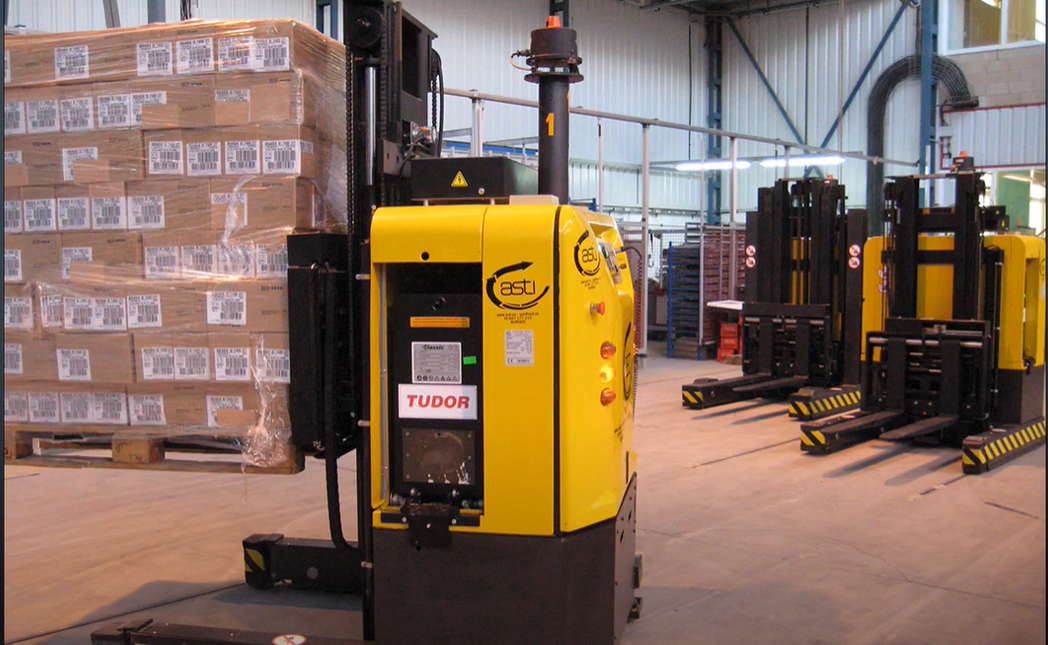

#### Import Required Libraries

In [ ]:
#import libraries
import numpy as np

**Introduction text**<br>The first task when designing a Q-learning system is
1:33
to define the environment.
1:35
The environment consists of: States;
1:38
Actions; and Rewards.
1:40
The AI agent will use the states and rewards as inputs, and will generate actions as outputs.

Let’s briefly discuss the states for our warehouse robot scenario.
1:53
First, consider that our e-commerce company’s warehouse can be represented as a diagram,
1:58
as shown here.
1:59
In the diagram, each black square represents an item storage location, such as a shelf
2:05
or a storage bin.
2:06
Each white square in the diagram is part of an aisle that the robots can use to travel
2:11
throughout the warehouse.
2:12
Finally, the green square in the diagram indicates the location of the item packaging area.
2:19
Next, note that each of the 121 locations in the warehouse represents a state, or situation
2:26
in which a robot might find itself at a particular point in time.
2:30
Each state can be identified by a row and column index.
2:34
The item packaging area, for example, is at location (0, 5).
2:40
Note also that the black and green squares are terminal states.
2:44
This means that if our AI agent decides to drive a robot into one of these areas while
2:49
it is being trained, then that training episode will be finished.
2:53
In the case of the green square, our AI agent will have achieved its goal, but in the case
2:58
of any of the black squares, the AI agent will have failed, since it will have crashed
3:02
the robot into an item storage area!
3:05
This sort of failure is conceptually identical to falling down the cliff in the famous cliff-walking
3:10
example that we discussed in the previous video in this series.
3:14

## Define the Environment
The environment consists of **states**, **actions**, and **rewards**. States and actions are inputs for the Q-learning AI agent, while the possible actions are the AI agent's outputs.
#### States
The states in the environment are all of the possible locations within the warehouse. Some of these locations are for storing items (**black squares**), while other locations are aisles that the robot can use to travel throughout the warehouse (**white squares**). The **green square** indicates the item packaging and shipping area.

The black and green squares are **terminal states**!

![warehouse map](https://www.danielsoper.com/teaching/img/08-warehouse-map.png)

The AI agent's goal is to learn the shortest path between the item packaging area and all of the other locations in the warehouse where the robot is allowed to travel.

As shown in the image above, there are 121 possible states (locations) within the warehouse. These states are arranged in a grid containing 11 rows and 11 columns. Each location can hence be identified by its row and column index.

#####  **[NUMBER 1:]**

In [ ]:
# Speech
# Our first major task in this project (and indeed in any reinforcement learning project) is to define the environment.
# Let’s begin with the states.Recall that our warehouse can be represented by a grid.
# So, let’s define the dimensions of that grid.
# In this scenario, we have 11 rows and 11 columns, yielding 121 possible states (or locations).

environment_rows = 11
environment_columns = 11

# Speech
# Next, let’s use numpy to define a three-dimensional array.
# We’ll be using this array to hold all of our Q-values for the project.
# we’ll have one Q-value for each combination of a state and an action.
# The first two dimensions (environment_rows, environment_columns) will therefore represent
# the rows and columns that define our states, while the third dimension (4) will contain one element
# for each possible action that the AI agent might take while in a particular state.
# Note that we’re using numpy’s “zeros” function to initialize all of our Q-values to zero.

q_values = np.zeros((environment_rows, environment_columns, 4))

**Introduction text**<br>Next, let’s briefly discuss actions.
3:18
The actions that are available to the AI agent in our scenario are simply to move the robot
3:23
in one of four directions: Up;
3:25
Right; Down; or
3:27
Left.
3:29
Again, the AI agent will need to learn to choose actions that will prevent the robot
3:34
from crashing into the item storage areas!
3:37

#### Actions
The actions that are available to the AI agent are to move the robot in one of four directions:
* Up
* Right
* Down
* Left

Obviously, the AI agent must learn to avoid driving into the item storage locations (e.g., shelves)!


In [ ]:
# Speech
# Next, we’ll define the four actions that our AI agent may take – up, right, down,
# Based on its index location in the “actions” list, each action will be associated with a numeric code.
# 0 will mean “up”, 1 will mean “right”, 2 will mean “down”, and 3 will mean “left”.

#define actions
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

**Introduction text**<br>Finally, let’s discuss the reward structure for our scenario.
3:41
To help the AI agent learn, each state (or location) in the warehouse is assigned a reward
3:47
value.
3:48
The agent may begin at any white square, but regardless of where the agent begins, its
3:52
goal is always the same: to maximize its total rewards.
3:57
Note that in this scenario negative rewards (that is, punishments) are being used for
4:02
all states except the goal.
4:04
This encourages the AI to identify the shortest path to the goal by minimizing its punishments.
4:12
You might be wondering why we don’t use positive rewards for the white squares.
4:16
Well, remember that the AI agent’s goal is always to maximize its cumulative rewards.
4:21
If we were to use positive rewards for the white squares, then the agent could simply
4:25
drive around on the white squares forever and accumulate a very large cumulative reward,
4:30
even if it never reaches the goal.
4:33
By using negative rewards, the agent receives a small punishment for each step that it takes,
4:38
and so to minimize its punishments, it will try to reach the item shipping location by
4:43
taking the fewest steps possible from its current location.
4:46
The result, of course, will be the shortest path from the current location to the goal.
4:52
Now that we’re familiar with our scenario and with the states, actions, and rewards
4:56
that will define the environment, let’s switch to Python, and take a look at some
4:59
code!

[Get back to note NUMBER 1]

#### Rewards
The last component of the environment that we need to define are the **rewards**.

To help the AI agent learn, each state (location) in the warehouse is assigned a reward value.

The agent may begin at any white square, but its goal is always the same: ***to maximize its total rewards***!

Negative rewards (i.e., **punishments**) are used for all states except the goal.
* This encourages the AI to identify the *shortest path* to the goal by *minimizing its punishments*!

![warehouse map](https://www.danielsoper.com/teaching/img/08-warehouse-map-rewards.png)

To maximize its cumulative rewards (by minimizing its cumulative punishments), the AI agent will need find the shortest paths between the item packaging area (green square) and all of the other locations in the warehouse where the robot is allowed to travel (white squares). The agent will also need to learn to avoid crashing into any of the item storage locations (black squares)!

In [ ]:
# Speech
# Now we can define the last element of our environment – the rewards.
# Each state in the environment has a reward value, so we can use a two-dimensional array
# to hold the reward values for each location within the environment.
# We'll begin by first creating a two-dimensional array, and initializing
# all of the array values to -100.
# We’re beginning with all of the values set to -100 because the majority of the squares
# ]


#Create a 2D numpy array to hold the rewards for each state.
#The array contains 11 rows and 11 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)

# Speech
# Next, we’re setting the reward for the packaging area (that is, the goal) to 100.
# Note that the packaging area is located at row 0, column 5.
# ]
rewards[0, 5] = 100. #set the reward for the packaging area (i.e., the goal) to 100


# Speech
# The next task is to construct a dictionary named “aisles” whose keys will be the
# indexes of all of the rows in the warehouse that contain at least one white square, and
# whose values will be a list containing the column indexes for each white square within a particular row.
# We need to do this task in order to specify the reward values for all of the white squares in the warehouse.
# ]

#define aisle locations (i.e., white squares) for rows 1 through 9
aisles = {} #store locations in a dictionary
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

# Speech
# Finally, we can use a set of nested “for” loops to iterate through our dictionary and
# set the reward values for all of the white squares in the warehouse to -1.
# We then print the results to the screen so that we can verify that the reward values
# were specified correctly.
# ]

#set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 10):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.

#print rewards matrix
for row in rewards:
  print(row)

# Run the code

In [ ]:
# Speech
# (demonstrate on the listed points below)
# Our environment is now fully configured, and we can proceed to the second major task in
# project, which is to train  AI agent to learn about its environment by implementing
# a Q-learning model. The learning process will follow these steps:
# First, we’ll choose a random, non-terminal
# state (that is, a white square) for the agent to begin a new episode.
# Second, the AI agent will choose an action (that is to move up, right, down, or left)
# for the current state.
# Actions will be chosen using what is known as an epsilon greedy algorithm.
# This algorithm will usually choose the most promising action for the AI agent, but it
# will occasionally choose a less promising option in order to encourage the agent to
# explore the environment.
# Third, the AI agent will perform the chosen action, and transition to the next state (that
# is, it will move to the next location).
# Fourth, the agent will receive the reward for moving to the new state, and will calculate
# the temporal difference value associated with that movement.
# The agent will then update the Q-value for the previous state and action pair.
# If the new (that is, the current) state is a terminal state, then we’ll loop back to #1 and start a new training episode.
# If not, then we’ll loop back to #2 and continue the current training episode.
# This entire process will be repeated across 1000 episodes.
# This will provide the AI agent sufficient opportunity to learn the shortest paths between
# the item packaging area and all other locations in the warehouse where the robot is allowed
# to travel, while simultaneously learning to avoid crashing into any of the item storage locations!
# ]

## Train the Model
Our next task is for our AI agent to learn about its environment by implementing a Q-learning model. The learning process will follow these steps:
1. Choose a random, non-terminal state (white square) for the agent to begin this new episode.
2. Choose an action (move *up*, *right*, *down*, or *left*) for the current state. Actions will be chosen using an *epsilon greedy algorithm*. This algorithm will usually choose the most promising action for the AI agent, but it will occasionally choose a less promising option in order to encourage the agent to explore the environment.
3. Perform the chosen action, and transition to the next state (i.e., move to the next location).
4. Receive the reward for moving to the new state, and calculate the temporal difference.
5. Update the Q-value for the previous state and action pair.
6. If the new (current) state is a terminal state, go to #1. Else, go to #2.

This entire process will be repeated across 1000 episodes. This will provide the AI agent sufficient opportunity to learn the shortest paths between the item packaging area and all other locations in the warehouse where the robot is allowed to travel, while simultaneously avoiding crashing into any of the item storage locations!

#### Define Helper Functions

In [ ]:
# Speech
# Let’s begin this part of the project by defining a few helper functions that will
# perform some useful tasks for our AI agent.
# ]

# Speech
# This first function determines if the state at the specified row and column location is a terminal state.
# It figures this out simply by looking at the reward for the specified state.
# If the reward is equal to -1, then the state is not a terminal state (that is, it is a white square).
# Otherwise, the state must be a terminal state (that is, a black or green square).
# ]

#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

# Speech
# This next function simply chooses a random starting location for a new training episode.
# The function just continues choosing random row and column indexes until it identifies
# a non-terminal state to use as the next starting location.
# ]

#define a function that will choose a random, non-terminal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_columns)
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  return current_row_index, current_column_index


# Speech
# This next function implements the epsilon greedy algorithm in order to choose the AI
# agent’s next action.
# This function works by checking whether a random number between 0 and 1 is less than
# the epsilon value (which in our project will be 0.9 or 90%).
# If so, then the algorithm will select the action with the largest Q-value for the current state.
# this means that our epsilon greedy algorithm will choose what appears to be the most promising action 90% of the time.
# For the remaining 10% of the time, it will choose a random action.
# This mechanism encourages the AI agent to explore its environment by occasionally choosing a less promising action.
# ]

#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon,
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

# Speech
# Our next function simply gets the next location in the warehouse, given the current location and the selected action.
# For example, if we’re currently located at row index 5 and column index 3, and we want to move “up”,
# this function will return the location at row index 4, column index 3.
# ]

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index


# Speech
# Finally, our last helper function returns a list that contains the shortest path between
# the specified starting location and the item packaging location in the warehouse.
# After we’ve trained our model, we’ll be able to call this function to see what the
# AI agent has learned about how to move within the warehouse.
# Let’s run this cell to make all of these functions available to our program.
# ]

#Define a function that will get the shortest path between any location within the warehouse that
#the robot is allowed to travel and the item packaging location.
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

In [ ]:
# Speech
# Now we’ve reached the most exciting part of the project – the part where we’ll
# actually train the AI agent using Q-learning!
# ]

#### Train the AI Agent using Q-Learning

In [ ]:
# Speech
# We begin by defining a few parameters that will guide the training process.
# First is “epsilon”, which will be used in conjunction with our epsilon greedy algorithm.
# Epsilon specifies the percentage of time when we should take the best action when we’re
# in a state, rather than taking a random action.
# Next is the discount factor.
# This will be used when we’re calculating temporal difference values to specify by how
# much we should discount future rewards.
# Finally, we specify the learning rate.
# This will control how quickly the AI agent learns.
# ]

  #define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn


# Speech
# The AI agent will learn by running through 1000 training episodes,
# and we’re using a “for” loop for that purpose.

  #run through 1000 training episodes
for episode in range(1000):



# The first thing that we do at the beginning of each training episode is to call the “get
# starting location” function in order to get the location of the white square where
# the AI agent should begin the episode.

    #get the starting location for this episode
  row_index, column_index = get_starting_location()



# We then set up a “while” loop, which will continue running until the AI agent moves
# into one of the terminal locations.
# Remember that the item packaging area and all of the item storage locations are terminal
# states, so if the agent reaches the packaging area or crashes into one of the item storage
# locations, the current training episode will end immediately.

    #continue taking actions (i.e., moving) until we reach a terminal state
    #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal_state(row_index, column_index):



# Each iteration of the “while” loop represents one step in the warehouse, so the first thing
# that we do at the beginning of each iteration is to call the “get next action” function
# to determine in which direction the AI agent should move next.
# Remember, actions are movements up, right, down, or left.

      #choose which action to take (i.e., where to move next)
    action_index = get_next_action(row_index, column_index, epsilon)



# We next store the current location, and then call the “get next location” function
# in order to move to the next location, based on the chosen action.

      #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)



# After we arrive at the new location, we get the immediate reward for moving to that location,
# and then compute the temporal difference value associated with our latest move by using the
# temporal difference formula.

      #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value



# Finally, we update the Q-value for the previous state and action based on what we’ve learned
# after moving to our current location.
# The new Q-value is calculated using the Bellman Equation
# And that’s it!
# We’ve just implemented a complete Q-learning-based AI system in Python!
# Let’s run this code cell, and train our AI agent.

  #run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

## Get Shortest Paths
Now that the AI agent has been fully trained, we can see what it has learned by displaying the shortest path between any location in the warehouse where the robot is allowed to travel and the item packaging area.

![warehouse map](https://www.danielsoper.com/teaching/img/08-warehouse-map.png)

Run the code cell below to try a few different starting locations!

In [ ]:
# Speech
# Now that our agent is fully trained, we can call the “get shortest path” function
# to get the shortest path that the agent identified between any white square in the warehouse
# and the item packaging location.
# Let’s see a few examples.
# (run the code and interpret it)
# ]

#display a few shortest paths
print(get_shortest_path(3, 9)) #starting at row 3, column 9
print(get_shortest_path(5, 0)) #starting at row 5, column 0
print(get_shortest_path(9, 5)) #starting at row 9, column 5

In [ ]:
# Speech
# Interpretation of the output above and the diagram below

# As you can see, the function gives us all of the steps on the shortest path between
# the starting location and the item packaging location.
# let’s visualize one of these paths – say the path that starts
# at row 9, column 5.
# As shown on the diagram, the AI agent has identified the shortest path between the two
# points, and has successfully learned to avoid crashing into any of the item storage locations.
# This is just one example, but if we were to check, we would find the same is true for
# every other possible starting location in the warehouse.
# ]

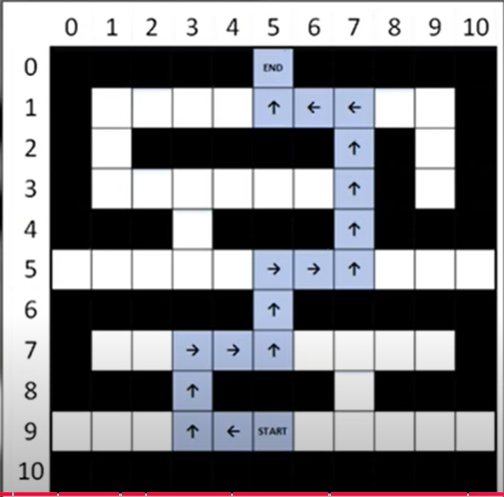

#### Finally...
It's great that our robot can automatically take the shortest path from any 'legal' location in the warehouse to the item packaging area. **But what about the opposite scenario?**

Put differently, our robot can currently deliver an item from anywhere in the warehouse ***to*** the packaging area, but after it delivers the item, it will need to travel ***from*** the packaging area to another location in the warehouse to pick up the next item!

Don't worry -- this problem is easily solved simply by ***reversing the order of the shortest path***.

Run the code cell below to see an example:

In [ ]:
# Speech
# Finally, it's great that our robot can automatically take the shortest path from any 'legal' location
# in the warehouse to the item packaging area, but what about the opposite scenario?
# Put differently, our robot can currently deliver an item from anywhere in the warehouse to
# the packaging area, but after it delivers the item, it will need to travel from the
# packaging area to another location in the warehouse to pick up the next item!
# This problem is easily solved simply by reversing the order of the shortest path.
# Let’s run the last code cell to see an example.
# ]

# display an example of reversed shortest path
path = get_shortest_path(5, 2) #go to row 5, column 2
path.reverse()
print(path)

In [ ]:
# Speech
# As you can see, if we need the robot to go from the item packaging area to the location
# at row 5, column 2, we just need to reverse the path.
# Our AI system can thus direct a warehouse robot to pick an item from anywhere in the
# warehouse and bring that item to the packaging area, and then send the robot from the packaging
# area to anywhere else in the warehouse to pick the next item.
# This is definitely cool stuff!
# Well, there you have it – a complete example of Q-learning in Python, from start to finish!
# I hope that you’re beginning to appreciate just how useful Q-learning can be, and that
# perhaps you've begun thinking about how you could apply Q-learning to solve other types
# of business problems.
# ]

# Briefly

**5**.  **Q-Learning Algorithm**

      The agent is at state zero in an environment.
      It will take an action based on a specific strategy.
      It will receive a reward or punishment based on that action.
      By learning from previous moves and optimizing the strategy.
      The process will repeat until an optimal strategy is found.

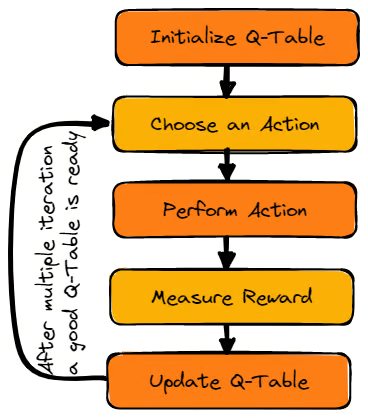